In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/nikhilprao/Documents/heart-failure-prediction-ml/data/heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop(columns=["DEATH_EVENT"])
y = df["DEATH_EVENT"]

# Standardize continuous variables (exclude binary/categorical columns)
continuous_cols = ["age", "creatinine_phosphokinase", "ejection_fraction",
                   "platelets", "serum_creatinine", "serum_sodium", "time"]
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[continuous_cols] = scaler.fit_transform(X[continuous_cols])

# Split into train and test sets (though we will train on small sample for now)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

X_train.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
225,1.192945,0,0.096174,1,1.854958,0,0.016816,0.005926,-2.639086,0,0,0.964571
78,1.192945,1,-0.391095,1,-0.007077,1,0.201166,-0.768683,-1.277026,1,1,-0.726094
66,-1.586025,1,-0.342574,1,-1.953749,0,-0.515749,-0.090900,-0.141976,0,0,-0.842246
296,-1.333392,0,1.525979,1,1.854958,0,4.902082,-0.575031,0.312044,0,0,1.906697
192,-0.912335,1,-0.475748,1,0.162199,0,-0.034392,-0.671857,-1.504036,1,0,0.577396


<Axes: title={'center': 'Death Event Distribution'}, xlabel='DEATH_EVENT'>

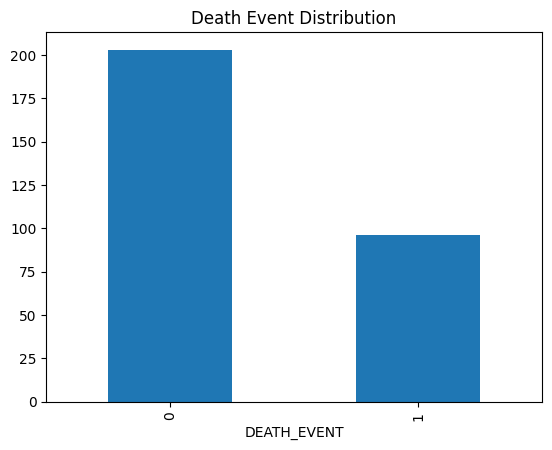

In [8]:
df["DEATH_EVENT"].value_counts().plot(kind='bar', title='Death Event Distribution')

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import warnings

warnings.filterwarnings("ignore")

# Define models and their hyperparameter grids
models = {
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l1", "l2"],
            "solver": ["liblinear"]
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [None, 5, 10],
            "min_samples_split": [2, 5]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [3, 6],
            "learning_rate": [0.01, 0.1],
            "subsample": [0.8, 1]
        }
    },
    "NeuralNetwork": {
        "model": MLPClassifier(max_iter=1000),
        "params": {
            "hidden_layer_sizes": [(50,), (100,), (50, 50)],
            "activation": ["relu", "tanh"],
            "solver": ["adam", "sgd"],
            "alpha": [0.0001, 0.001]
        }
    }
}

# Train and tune each model using GridSearchCV
best_models = {}
for name, mp in models.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv=3, scoring="f1", n_jobs=-1)
    clf.fit(X_train, y_train)
    best_models[name] = {
        "best_estimator": clf.best_estimator_,
        "best_params": clf.best_params_,
        "test_score": clf.score(X_test, y_test),
        "report": classification_report(y_test, clf.predict(X_test), output_dict=True)
    }


/opt/homebrew/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:39:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/homebrew/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:39:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/homebrew/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:39:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/homebrew/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:39:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

In [14]:
best_models

{'LogisticRegression': {'best_estimator': LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear'),
  'best_params': {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'},
  'test_score': 0.6538461538461537,
  'report': {'0': {'precision': 0.7407407407407407,
    'recall': 0.9090909090909091,
    'f1-score': 0.8163265306122449,
    'support': 44.0},
   '1': {'precision': 0.8095238095238095,
    'recall': 0.5483870967741935,
    'f1-score': 0.6538461538461537,
    'support': 31.0},
   'accuracy': 0.76,
   'macro avg': {'precision': 0.7751322751322751,
    'recall': 0.7287390029325513,
    'f1-score': 0.7350863422291993,
    'support': 75.0},
   'weighted avg': {'precision': 0.7691710758377425,
    'recall': 0.76,
    'f1-score': 0.7491679748822606,
    'support': 75.0}}},
 'RandomForest': {'best_estimator': RandomForestClassifier(max_depth=5, n_estimators=50),
  'best_params': {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50},
  'test_score': 0.6399999999999999

In [11]:
import pandas as pd

# Create summary DataFrame
summary_df = pd.DataFrame([
    {
        "Model": name,
        "Best Params": result["best_params"],
        "F1 Score": result["test_score"]
    } for name, result in best_models.items()
])

# Display in console
print(summary_df)


                Model                                        Best Params  \
0  LogisticRegression  {'C': 0.1, 'penalty': 'l1', 'solver': 'libline...   
1        RandomForest  {'max_depth': None, 'min_samples_split': 5, 'n...   
2             XGBoost  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   
3       NeuralNetwork  {'activation': 'relu', 'alpha': 0.001, 'hidden...   

   F1 Score  
0  0.653846  
1  0.615385  
2  0.641509  
3  0.627451  


In [15]:
# Re-run minimal setup due to environment reset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")

# Define and train models with minimal params for rerun
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "NeuralNetwork": MLPClassifier(max_iter=1000)
}

# Fit models and compute R2
r2_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_scores.append({
        "Model": name,
        "R2 Score": score
    })

# Show results
r2_df = pd.DataFrame(r2_scores)
r2_df



,Model,R2 Score
0,LogisticRegression,0.065249
1,RandomForest,-0.044721
2,XGBoost,0.010264
3,NeuralNetwork,-0.099707


In [ ]:
import joblib
import os
# Train the best logistic regression model again
logistic = LogisticRegression(max_iter=1000, C=0.1, penalty='l1', solver='liblinear')
logistic.fit(X_train, y_train)

# Save the model
save_path = "/Users/nikhilprao/Documents/heart-failure-prediction-ml/models/best_model_logistic_regression.pkl"
joblib.dump(logistic, save_path)

'/Users/nikhilprao/Documents/heart-failure-prediction-ml/models/best_model_logistic_regression.pkl'

In [18]:
import pandas as pd
import joblib

# Load model
model = joblib.load("/Users/nikhilprao/Documents/heart-failure-prediction-ml/models/best_model_logistic_regression.pkl")

# Load original dataset
df = pd.read_csv("/Users/nikhilprao/Documents/heart-failure-prediction-ml/data/heart_failure_clinical_records_dataset.csv")


In [19]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["DEATH_EVENT"])
y = df["DEATH_EVENT"]

# Standardize numerical columns (match training)
continuous_cols = ["age", "creatinine_phosphokinase", "ejection_fraction",
                   "platelets", "serum_creatinine", "serum_sodium", "time"]

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[continuous_cols] = scaler.fit_transform(X[continuous_cols])


In [20]:
# Predict label and probability
df["PREDICTED"] = model.predict(X_scaled)
df["RISK_SCORE"] = model.predict_proba(X_scaled)[:, 1]  # Probability of class 1


In [21]:
df.to_csv("heart_failure_predictions_tableau.csv", index=False)


In [22]:
df["DEATH_EVENT"].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64